In [22]:
# basic setup of notebook
%pylab inline
import pprint # pretty print
from iminuit import Minuit

Populating the interactive namespace from numpy and matplotlib


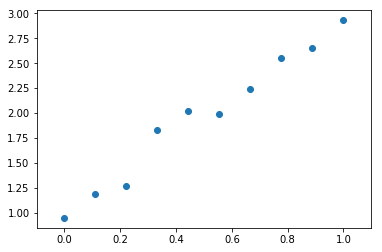

In [23]:
def line(x, a, b):
    return a + x * b

data_x = linspace(0, 1, 10)
# precomputed random numbers from a normal distribution
offsets = array([-0.49783783, -0.33041722, -1.71800806,  1.60229399,  1.36682387,
                 -1.15424221, -0.91425267, -0.03395604, -1.27611719, -0.7004073 ])
data_y = line(data_x, 1, 2) + 0.1 * offsets # generate some data points with random offsets
plot(data_x, data_y, "o")
xlim(-0.1, 1.1);

In [24]:
def least_squares(a,b):
    yvar=0.01
    return sum((data_y-line(data_x,a,b))**2/yvar)

In [25]:
m = Minuit(least_squares) # we create an instance of Minuit and pass the function to minimize
## lots of errors!!!

/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter a does not have initial value. Assume 0.
  """Entry point for launching an IPython kernel.
/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter b does not have initial value. Assume 0.
  """Entry point for launching an IPython kernel.
/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPyth

In [26]:
m = Minuit(least_squares, a=5, b=5) # pass starting values for a and b
## less errors

/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter a is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: Parameter b is floating but does not have initial step size. Assume 1.
  """Entry point for launching an IPython kernel.
/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.


In [27]:
m = Minuit(least_squares, a=5, b=5, error_a=0.1, error_b=0.1)
## few erros :)))

/home/jack/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: InitialParamWarning: errordef is not given. Default to 1.
  """Entry point for launching an IPython kernel.


In [28]:
m = Minuit(least_squares, a=5, b=5, error_a=0.1, error_b=0.1, errordef=1)


In [29]:
m = Minuit(least_squares, pedantic=False)  # silence warnings, use default values


In [30]:
m.get_param_states()

[{'number': 0,
  'name': 'a',
  'value': 0.0,
  'error': 1.0,
  'is_const': False,
  'is_fixed': False,
  'has_limits': False,
  'has_lower_limit': False,
  'has_upper_limit': False,
  'lower_limit': None,
  'upper_limit': None},
 {'number': 1,
  'name': 'b',
  'value': 0.0,
  'error': 1.0,
  'is_const': False,
  'is_fixed': False,
  'has_limits': False,
  'has_lower_limit': False,
  'has_upper_limit': False,
  'lower_limit': None,
  'upper_limit': None}]

In [31]:
m = Minuit(least_squares, a=5, b=5,
           error_a=0.1, error_b=0.1,
           limit_a=(0, None), limit_b=(0, 10),
           errordef=1)
m.get_param_states()

[{'number': 0,
  'name': 'a',
  'value': 5.0,
  'error': 0.1,
  'is_const': False,
  'is_fixed': False,
  'has_limits': True,
  'has_lower_limit': True,
  'has_upper_limit': False,
  'lower_limit': 0.0,
  'upper_limit': None},
 {'number': 1,
  'name': 'b',
  'value': 5.0,
  'error': 0.1,
  'is_const': False,
  'is_fixed': False,
  'has_limits': True,
  'has_lower_limit': True,
  'has_upper_limit': True,
  'lower_limit': 0.0,
  'upper_limit': 10.0}]

In [32]:
m = Minuit(least_squares, a=5, b=5, fix_a=True,
           error_a=0.1, error_b=0.1,
           errordef=1)
m.get_param_states()


[{'number': 0,
  'name': 'a',
  'value': 5.0,
  'error': 0.1,
  'is_const': False,
  'is_fixed': True,
  'has_limits': False,
  'has_lower_limit': False,
  'has_upper_limit': False,
  'lower_limit': None,
  'upper_limit': None},
 {'number': 1,
  'name': 'b',
  'value': 5.0,
  'error': 0.1,
  'is_const': False,
  'is_fixed': False,
  'has_limits': False,
  'has_lower_limit': False,
  'has_upper_limit': False,
  'lower_limit': None,
  'upper_limit': None}]

In [33]:
# migrad will not vary a, only b
m.migrad()

FCN = 4662.9094007925905 
 TOTAL NCALL = 13 
 NCALLS = 13 
 
 
 EDM = 6.997483800719733e-14 
 GOAL EDM = 1e-05 
 
 UP = 1.0 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,a,5,0.1,,,,,Yes
1,b,-3.7521,0.0533114,,,,,No


({'fval': 4662.9094007925905,
  'edm': 6.997483800719733e-14,
  'nfcn': 13,
  'up': 1.0,
  'is_valid': True,
  'has_valid_parameters': True,
  'has_accurate_covar': True,
  'has_posdef_covar': True,
  'has_made_posdef_covar': False,
  'hesse_failed': False,
  'has_covariance': True,
  'is_above_max_edm': False,
  'has_reached_call_limit': False},
 [{'number': 0,
   'name': 'a',
   'value': 5.0,
   'error': 0.1,
   'is_const': False,
   'is_fixed': True,
   'has_limits': False,
   'has_lower_limit': False,
   'has_upper_limit': False,
   'lower_limit': None,
   'upper_limit': None},
  {'number': 1,
   'name': 'b',
   'value': -3.752102998713294,
   'error': 0.053311398998998255,
   'is_const': False,
   'is_fixed': False,
   'has_limits': False,
   'has_lower_limit': False,
   'has_upper_limit': False,
   'lower_limit': None,
   'upper_limit': None}])